## Training and Testing the LeNet Model on my Custom Handwritten Digits

#### Training and saving the model

In [30]:
from le_net import LeNet

lenet = LeNet(batch_size=32, epochs=20)
lenet.train()

# Saving the model
lenet.save('adupa_cnn_model.keras')

Epoch 1/20
1875/1875 [==============================] - 28s 14ms/step - loss: 0.7852 - accuracy: 0.7384
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1704 - accuracy: 0.9482
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1106 - accuracy: 0.9660
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0848 - accuracy: 0.9733
Epoch 5/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0696 - accuracy: 0.9786
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0594 - accuracy: 0.9814
Epoch 7/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0520 - accuracy: 0.9837
Epoch 8/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0450 - accuracy: 0.9858
Epoch 9/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0404 - accuracy: 0.9870
Epoch 10/20
1875/1875 [==============================] - 37s 20m

#### Load the Trained Model

In [31]:
lenet = LeNet()
# Loading saved model
lenet.load('adupa_cnn_model.keras')

In [42]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Dataset path containing my custom handwritten digit images
dataset_path = "Custom MNIST Samples"

# Function to load and preprocess an image
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0 
    return img

#### List all images

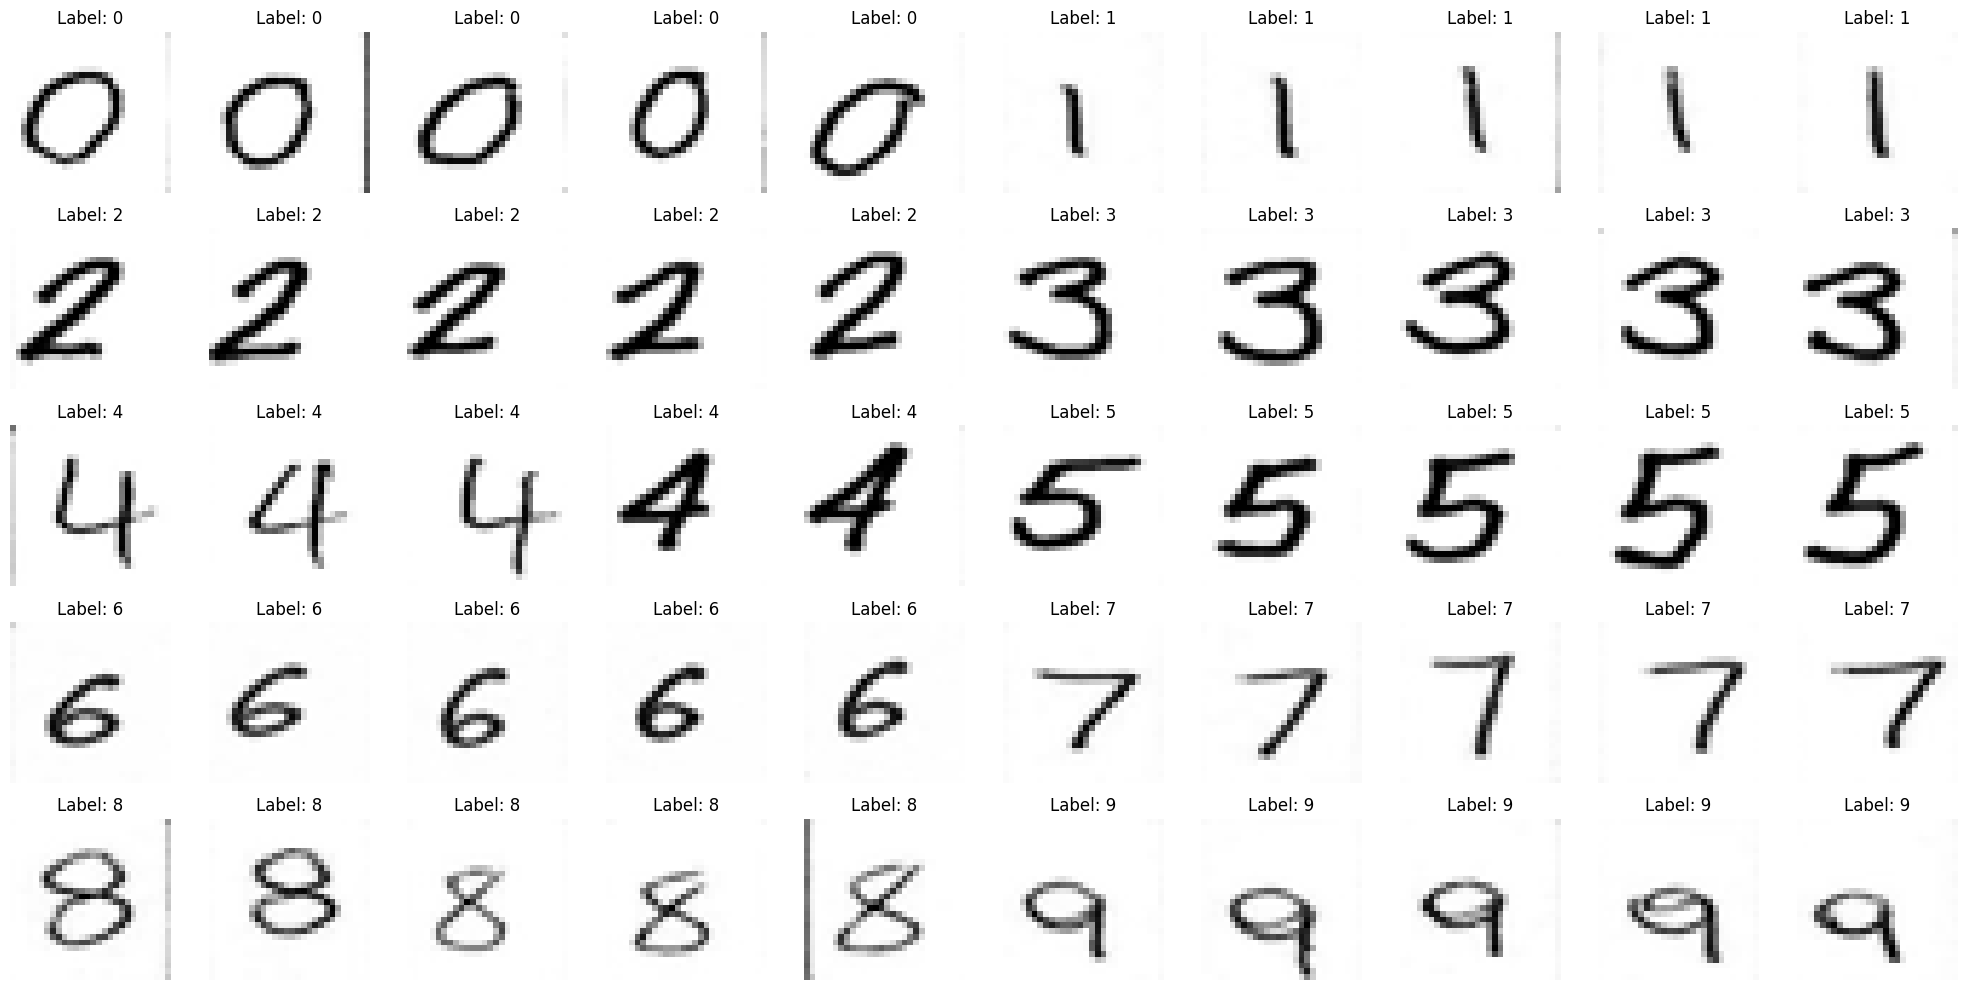

In [43]:
handwritten_images = glob.glob(os.path.join(dataset_path, "*", "*.png"))

fig, axes = plt.subplots(
    nrows=(len(handwritten_images) - 1) // 10 + 1, 
    ncols=10, 
    figsize=(20, 2 * ((len(handwritten_images) - 1) // 10 + 1))
)
axes = axes.flatten()

for idx, img_file in enumerate(handwritten_images):
    digit_label = os.path.basename(os.path.dirname(img_file)).split()[-1]
    img = Image.open(img_file)    
    axes[idx].imshow(img, cmap='gray')
    axes[idx].title.set_text(f"Label: {digit_label}")
    axes[idx].axis('off')

for idx in range(len(handwritten_images), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Testing the Trained Model on my Custom Dataset

In [39]:
import os
import glob

In [40]:
folders = glob.glob(os.path.join(dataset_path, "*"))
for digit_folder in folders:
    digit_label = os.path.basename(os.path.normpath(digit_folder))[-1] 

    for img_file in glob.glob(os.path.join(digit_folder, "*.png")):        
        img = load_image(img_file)
        image_file_name = os.path.basename(img_file)
        
        prediction = lenet.predict([img])
        predicted_label = prediction[0] if prediction is not None else None
                     
        if predicted_label == int(digit_label):
            print(f"Success: Image {image_file_name} for digit {digit_label} is recognized as {predicted_label}.")
        else:
            print(f"Fail: Image {image_file_name} for digit {digit_label} but the inference result is {predicted_label}.")

1/1 [==============================] - 0s 121ms/step
Fail: Image 0_0.png for digit 0 but the inference result is 5.
1/1 [==============================] - 0s 27ms/step
Fail: Image 0_1.png for digit 0 but the inference result is 5.
1/1 [==============================] - 0s 42ms/step
Fail: Image 0_2.png for digit 0 but the inference result is 5.
1/1 [==============================] - 0s 94ms/step
Fail: Image 0_3.png for digit 0 but the inference result is 5.
1/1 [==============================] - 0s 49ms/step
Fail: Image 0_4.png for digit 0 but the inference result is 5.
1/1 [==============================] - 0s 23ms/step
Fail: Image 1_0.png for digit 1 but the inference result is 5.
1/1 [==============================] - 0s 24ms/step
Fail: Image 1_1.png for digit 1 but the inference result is 5.
1/1 [==============================] - 0s 41ms/step
Fail: Image 1_2.png for digit 1 but the inference result is 5.
1/1 [==============================] - 0s 33ms/step
Fail: Image 1_3.png for dig